In [2]:
suppressMessages(library(ArchR))
suppressMessages(library(Seurat))
suppressMessages(library(Signac))
suppressMessages(library(cowplot))

In [2]:
obj.atac <- readRDS("../data/VisiumHeart/snATAC.Rds")
obj.atac

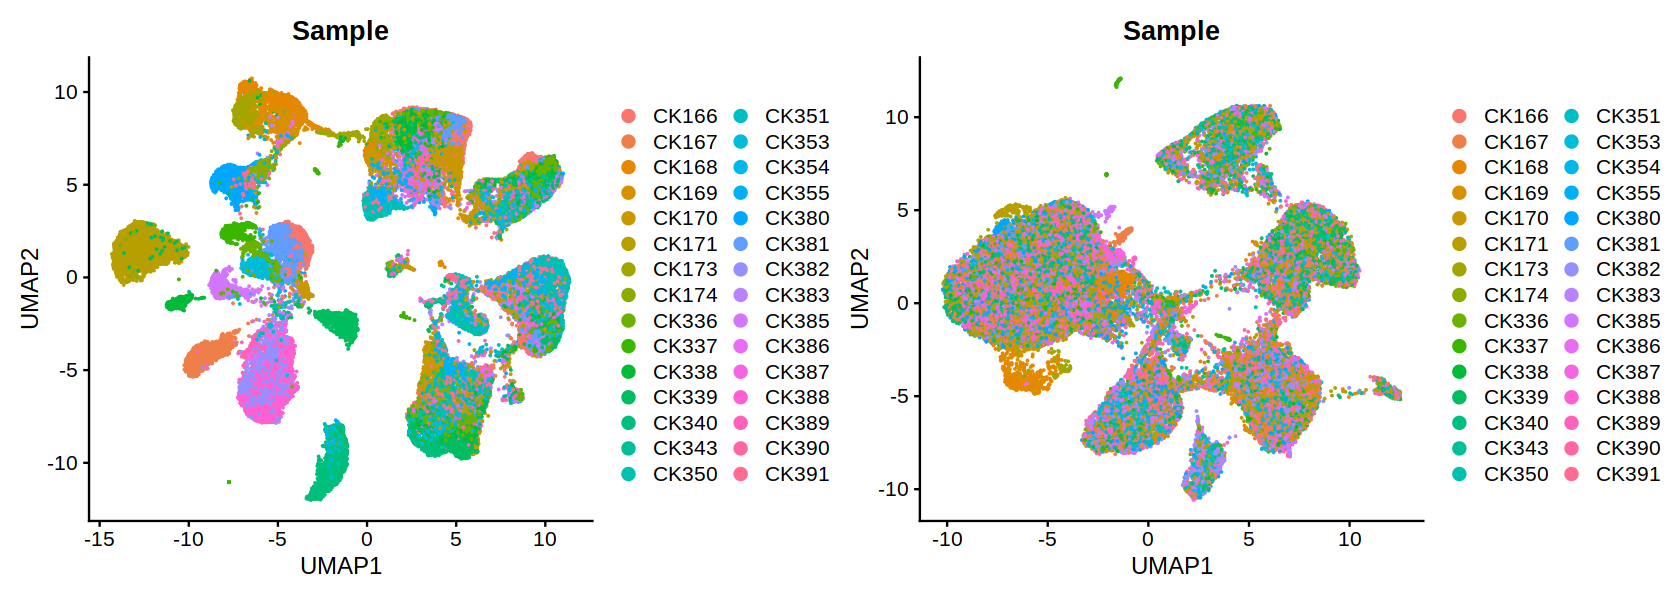

In [4]:
options(repr.plot.width = 14, repr.plot.height = 5)

p1 <- DimPlot(object = obj.atac, reduction = "umap",
              group.by = "Sample") +
    xlab("UMAP1") + ylab("UMAP2")

p2 <- DimPlot(object = obj.atac, reduction = "umap_harmony",
              group.by = "Sample", shuffle = TRUE) +
    xlab("UMAP1") + ylab("UMAP2")

p1 + p2

In [32]:
resolutions <- seq(0.2, 1, 0.1)

obj.atac <- FindNeighbors(obj.atac, reduction = "harmony", dims = 1:30)
obj.atac <- FindClusters(obj.atac, resolution = resolutions, verbose = FALSE)

Computing nearest neighbor graph

Computing SNN



In [6]:
library(clustree)

options(repr.plot.height = 8, repr.plot.width = 12)

clustree(obj.atac, prefix = "peaks_snn_res.")

Loading required package: ggraph



Length of unique values greater than palette, interpolating..

Length of unique values greater than palette, interpolating..

Length of unique values greater than palette, interpolating..

Length of unique values greater than palette, interpolating..



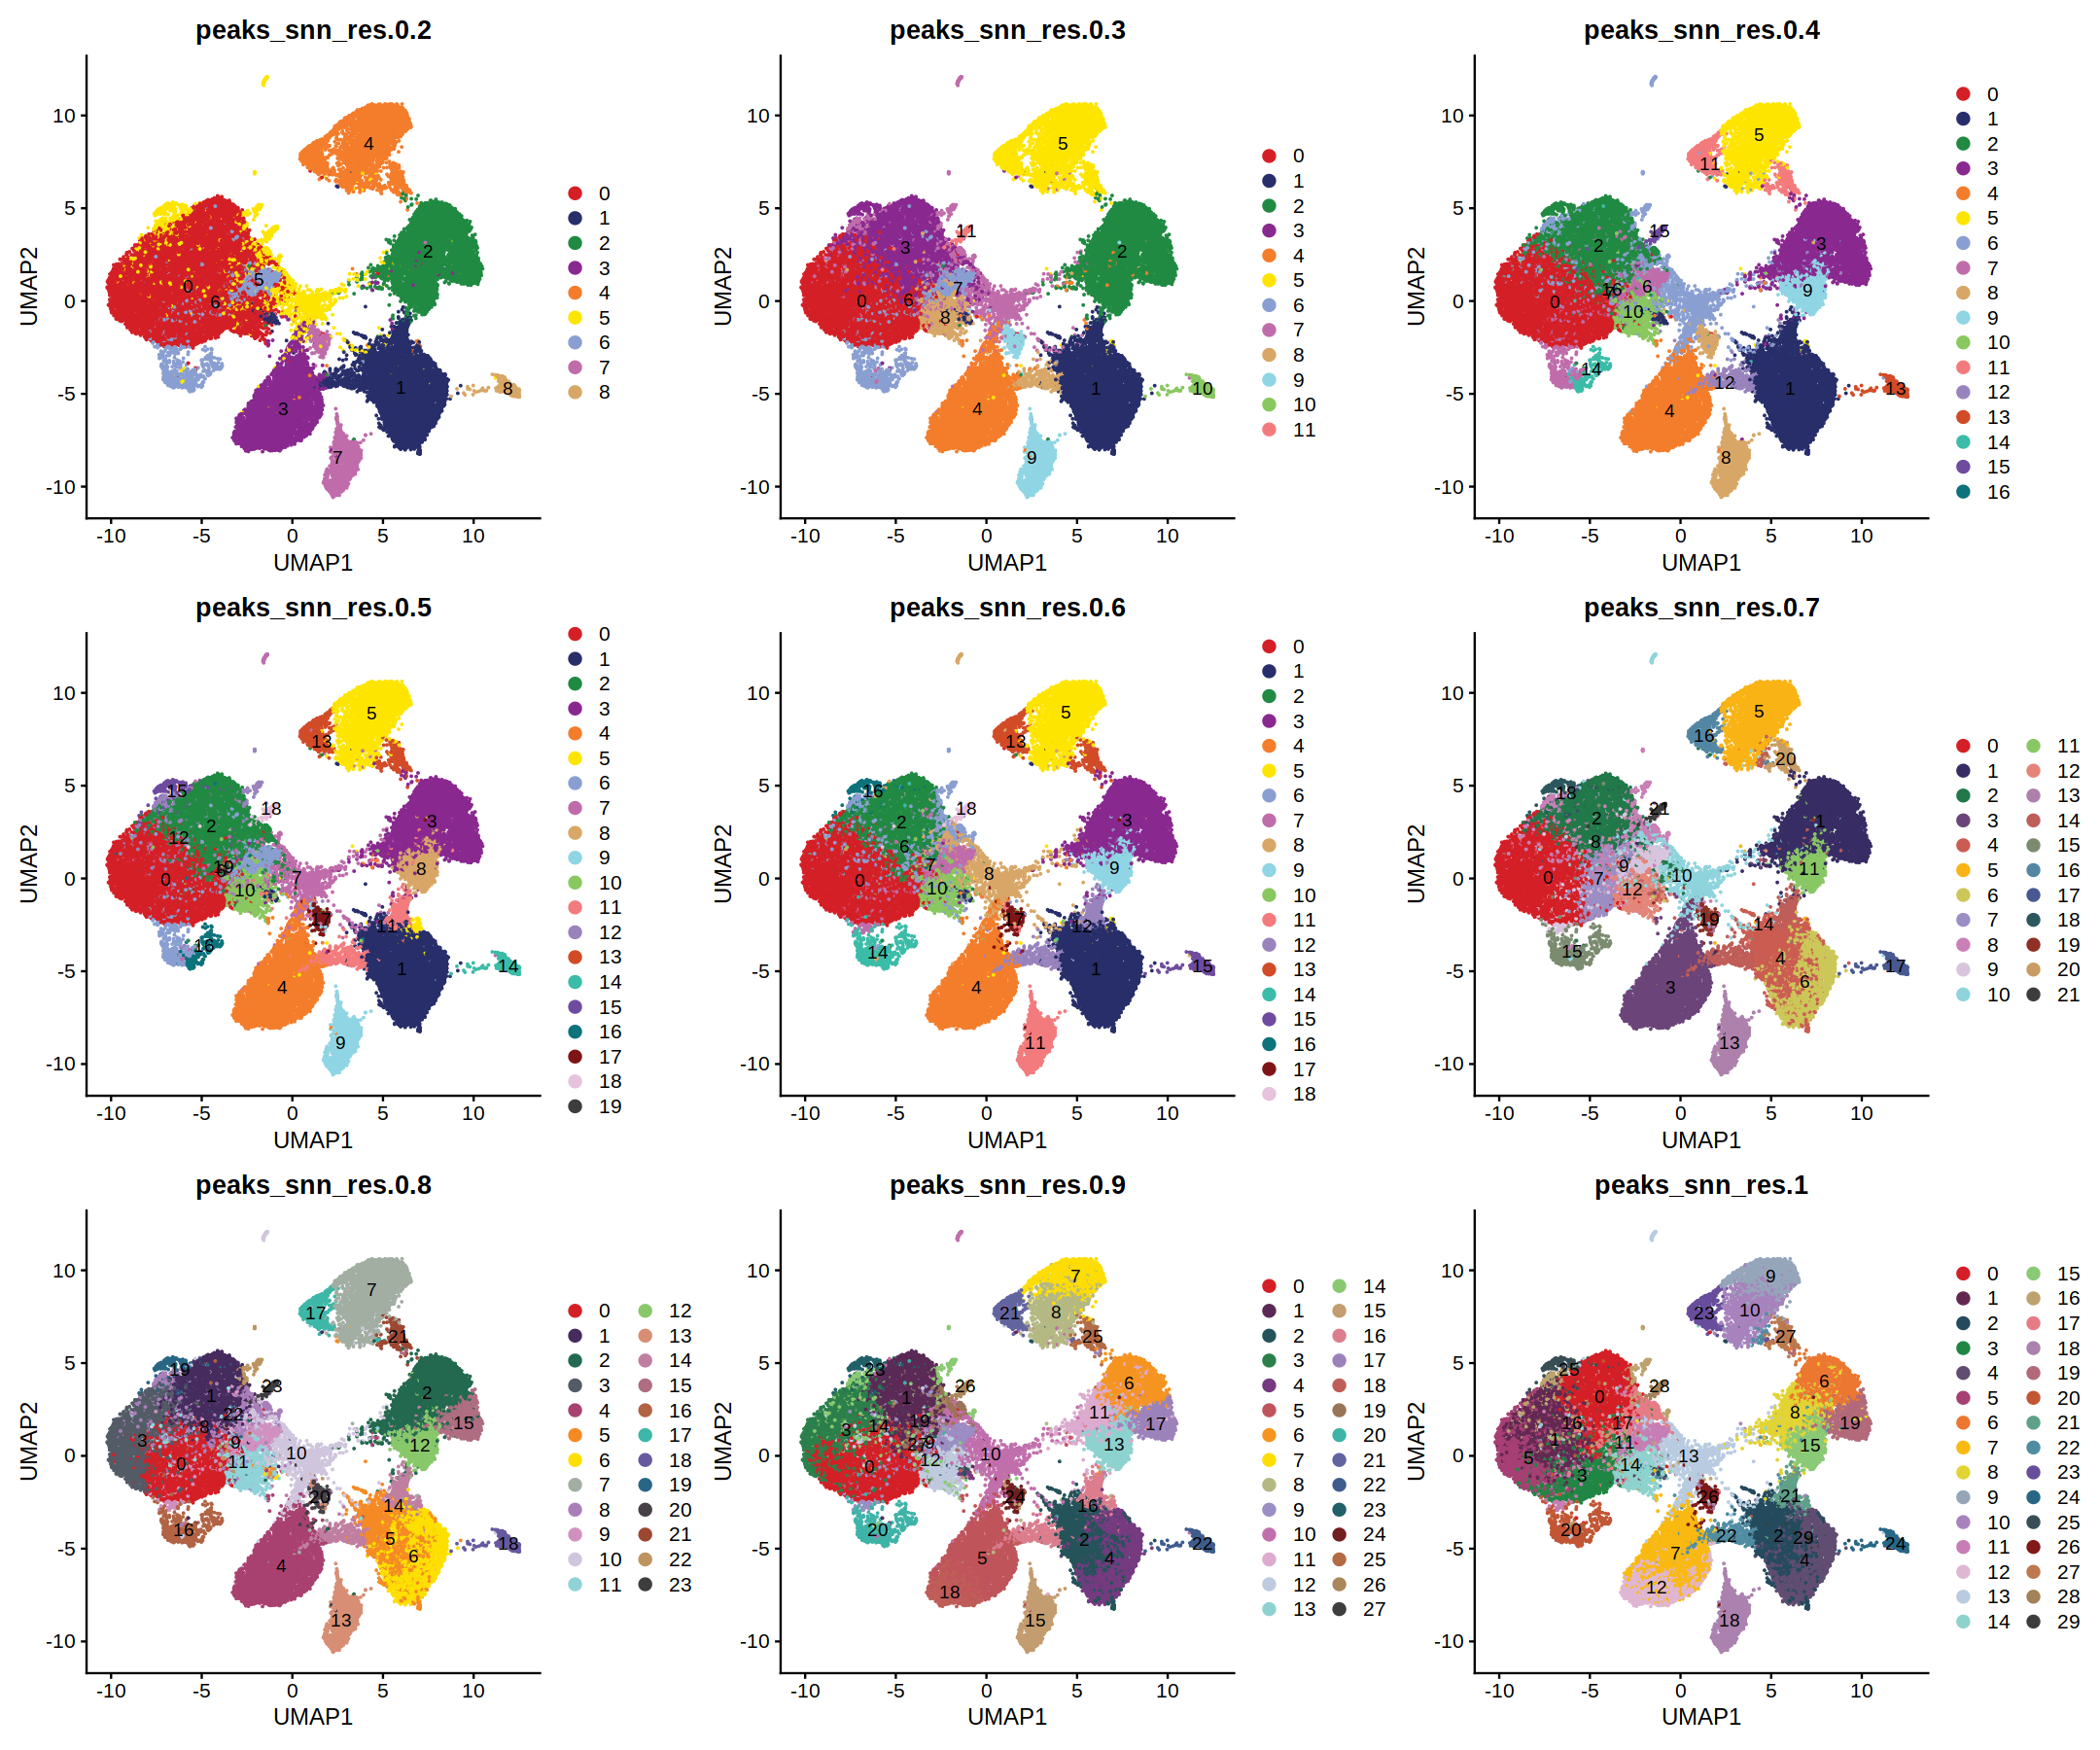

In [48]:
options(repr.plot.height = 15, repr.plot.width = 18)

plotlist <- lapply(resolutions, function(x){
    cols <- ArchR::paletteDiscrete(obj.atac@meta.data[, glue::glue("peaks_snn_res.{x}")])
    
    p <- DimPlot(obj.atac, group.by = glue::glue("peaks_snn_res.{x}"), label = TRUE,
             reduction = "umap_harmony", shuffle = TRUE) +
    scale_color_manual(values = cols) +
    xlab("UMAP1") + ylab("UMAP2")
    
    p
})

p <- patchwork::wrap_plots(plotlist, ncol = 3)

p

In [3]:
proj <- loadArchRProject("../data/VisiumHeart")

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

In [52]:
## add clusters to ArchR project
clusters <- obj.atac@meta.data[rownames(proj), "peaks_snn_res.1"]

proj <- addCellColData(proj, 
                       data = as.character(clusters), 
                       name = "Clusters", 
                       cells = rownames(proj), 
                       force = TRUE)

## add UMAP embedding
embedding <- obj.atac@reductions$umap_harmony@cell.embeddings
embedding <- embedding[rownames(proj), ]

colnames(embedding) <- c("Harmony#UMAP_Dimension_1",
                         "Harmony#UMAP_Dimension_2")

proj@embeddings[["umap_hearmony"]] <- SimpleList(df = as.data.frame(embedding),
                                      params = NULL)

Overriding previous entry for Clusters



ArchR logging to : ArchRLogs/ArchR-plotEmbedding-27849a344797e-Date-2021-09-21_Time-12-00-29.log
If there is an issue, please report to github with logFile!

Getting UMAP Embedding

ColorBy = cellColData

Plotting Embedding

1 
Length of unique values greater than palette, interpolating..



ArchR logging successful to : ArchRLogs/ArchR-plotEmbedding-27849a344797e-Date-2021-09-21_Time-12-00-29.log



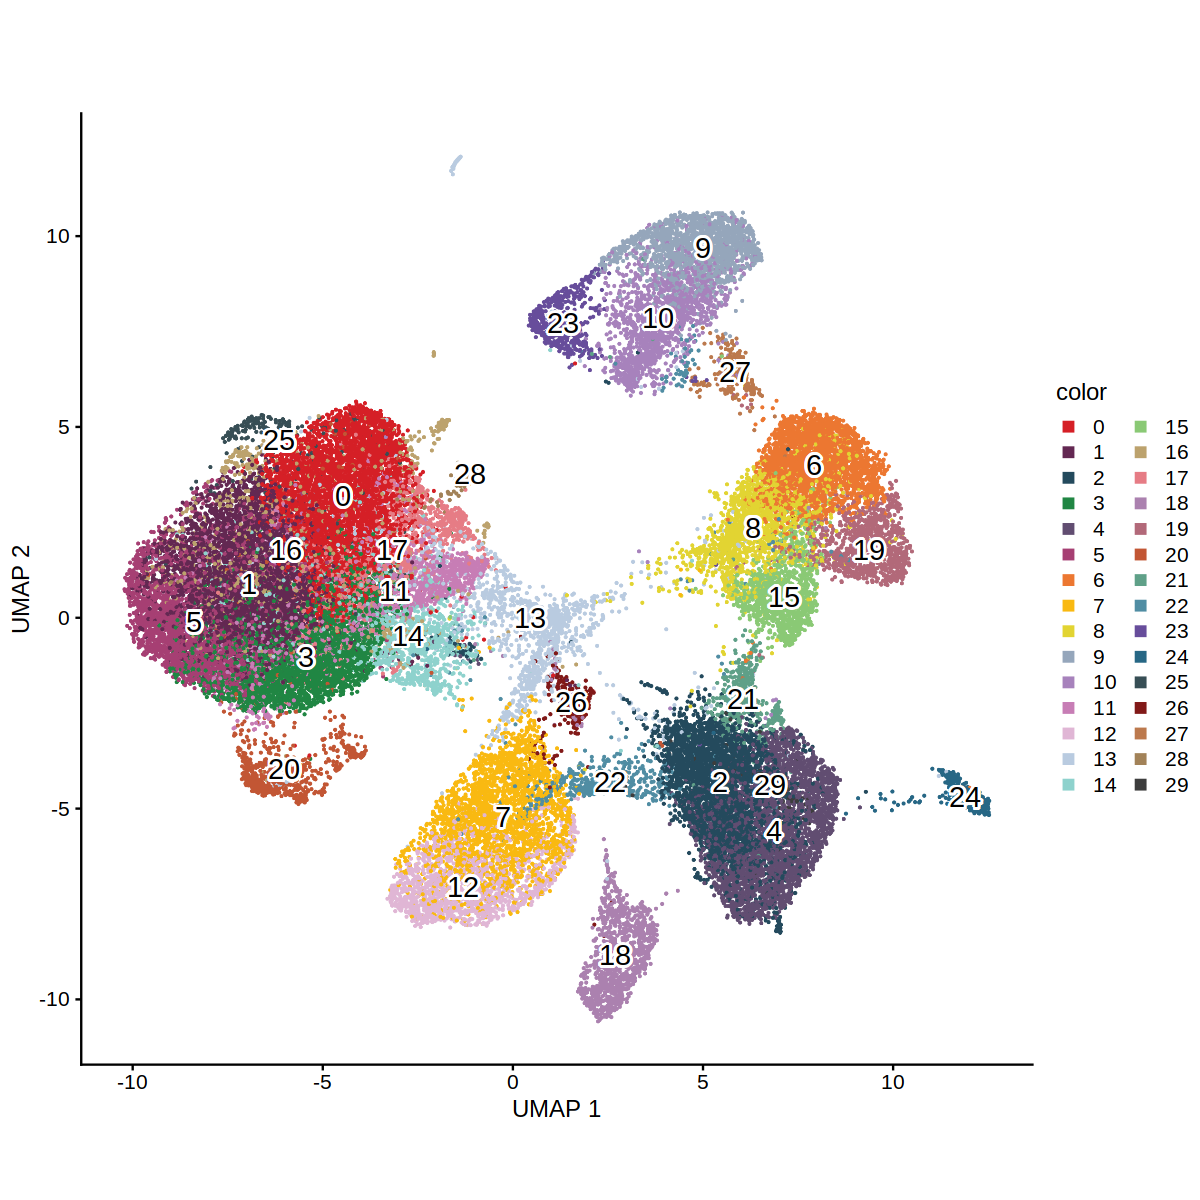

In [6]:
p <- plotEmbedding(ArchRProj = proj,
                   embedding = "umap_hearmony",
                   colorBy = "cellColData",
                   name = "Clusters",
                  baseSize = 20,
                  labelSize = 6,
                  labelAsFactors = FALSE) +
    theme_cowplot() +
    xlab("UMAP 1") + ylab("UMAP 2") +
    ggtitle("")

options(repr.plot.height = 10, repr.plot.width = 12)

print(p)

In [62]:
markersGS <- getMarkerFeatures(
    ArchRProj = proj, 
    useMatrix = "GeneScoreMatrix", 
    groupBy = "Clusters",
    bias = c("TSSEnrichment", "log10(nFrags)"),
    testMethod = "wilcoxon"
)

markerList <- getMarkers(markersGS)
markerList <- lapply(markerList, as.data.frame)

saveRDS(markersGS, file = "../data/VisiumHeart/MarkerGenes.Rds")

for(i in 1:length(markerList)){
    markerList[[i]] <- markerList[[i]][order(-markerList[[i]]$MeanDiff), ]
}

WriteXLS::WriteXLS(markerList,
                   ExcelFileName = "../data/VisiumHeart/MarkerGenes.xlsx",
                   SheetNames = names(markerList))

ArchR logging to : ArchRLogs/ArchR-getMarkerFeatures-1f46dd4e61ae20-Date-2021-09-20_Time-23-19-23.log
If there is an issue, please report to github with logFile!

MatrixClass = Sparse.Double.Matrix

2021-09-20 23:19:24 : Matching Known Biases, 0.003 mins elapsed.

2021-09-20 23:19:46 : Computing Pairwise Tests (1 of 30), 0.365 mins elapsed.

Pairwise Test 0 : Seqnames chr1

Pairwise Test 0 : Seqnames chr10

Pairwise Test 0 : Seqnames chr11

Pairwise Test 0 : Seqnames chr12

Pairwise Test 0 : Seqnames chr13

Pairwise Test 0 : Seqnames chr14

Pairwise Test 0 : Seqnames chr15

Pairwise Test 0 : Seqnames chr16

Pairwise Test 0 : Seqnames chr17

Pairwise Test 0 : Seqnames chr18

Pairwise Test 0 : Seqnames chr19

Pairwise Test 0 : Seqnames chr2

Pairwise Test 0 : Seqnames chr20

Pairwise Test 0 : Seqnames chr21

Pairwise Test 0 : Seqnames chr22

Pairwise Test 0 : Seqnames chr3

Pairwise Test 0 : Seqnames chr4

Pairwise Test 0 : Seqnames chr5

Pairwise Test 0 : Seqnames chr6

Pairwise Test 0 

In [ ]:
markerGenes  <- c(
    "GPAM", "FASN", "LEP",  # Adipocytes
    "NPPA", "MYL7", "MYL4",  # Atrial_Cardiomyocytes
    "VWF", "PECAM1", "CDH5",  # Endothelial
    "DCN", "GSN", "PDGFRA",  # Fibroblats
    "CD8A", "IL7R", "CD40LG",  # Lymphoid
    "MSLN", "WT1", "BNC1",  # Mesothelial
    "CD14", "C1QA", "CD68",  # Myeloid
    "PLP1", "NRXN1", "NRXN3",  # Neuronal
    "RGS5", "ABCC9", "KCNJ8",  # Pericytes
    "MYH11", "TAGLN", "ACTA2",  # vSMCs
    "MYH7", "MYL2", "FHL2"  # Ventricular_Cardiomyocytes
 )

heatmapGS <- plotMarkerHeatmap(
  seMarker = markersGS, 
  labelMarkers = markerGenes
)

options(repr.plot.height = 10, repr.plot.width = 10)

ComplexHeatmap::draw(heatmapGS, 
                     heatmap_legend_side = "bot", 
                     annotation_legend_side = "bot")

In [ ]:
## Save data

saveArchRProject(ArchRProj = proj, load = FALSE)
saveRDS(obj.atac, "../data/VisiumHeart/snATAC.Rds")

In [ ]:
## Session information

sessionInfo()